### Imput data : CSV file with information on the heart rate of a person engaged in various tapes of physical activity .
### Task : to plot the graph of heart rate and highlight the ranges of certain tipes of activity.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 8)

In [2]:
#load data
data = pd.read_csv('./data.csv')
columns = ['timestamp', 'activity', 'heart_rate']

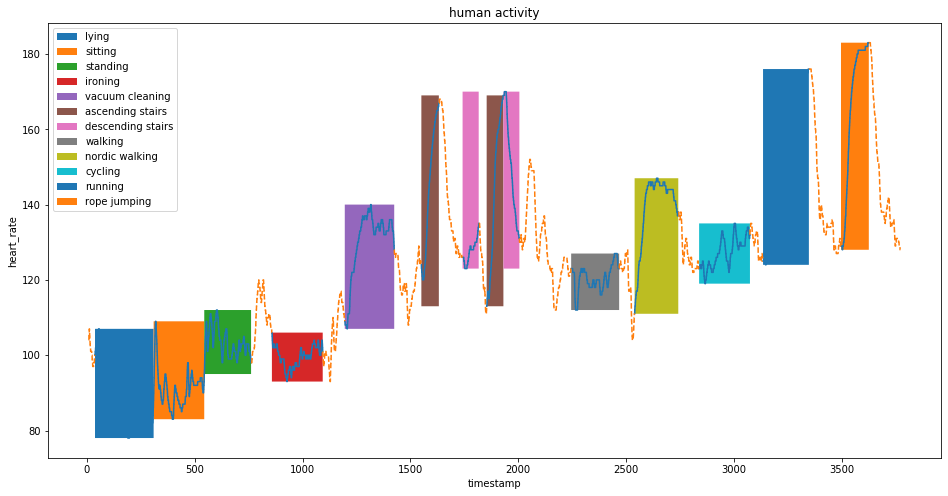

In [5]:
#splitting the graph into activity classes using the 'where' command

data['other'] = np.where(data['activity'] == 'other', data['heart_rate'], np.nan)
data['all_activity'] = np.where(data['activity']!= 'other', data['heart_rate'], np.nan) 

plt.plot(data['timestamp'], data['all_activity'])
plt.plot(data['timestamp'], data['other'], linestyle = '--')

# When analyzing data, the user wants many times see unique values in a specific column,
# what can be done with the unique() function.
for s in data['activity'].unique():
    if s == 'other':
        continue
    
    relevant = data['activity'] == s
    heart = data['heart_rate'][relevant]
    plt.fill_between(data['timestamp'], heart.min(), heart.max(), where = relevant, label = s)
    
plt.xlabel('timestamp')
plt.ylabel('heart_rate')
plt.title('human activity')
plt.legend()
plt.show()
